In [3]:
# 2. データの読み込み（Excelファイル）

from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

file_path = "/content/drive/My Drive/github/利益予測データベース.xlsx"  # アップロードしたファイルのパス
df = pd.read_excel(file_path)

# 1. 必要なライブラリをインポート
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Mounted at /content/drive


In [4]:
# 3. データ分割
# 'df' (DataFrame) をNumPy配列に変換します
data = df.values

x_train = data[:, 3:8][data[:, 1] == 1]
y_train = data[:, 2][data[:, 1] == 1]
x_test = data[:, 3:8][data[:, 1] == 2]
y_test = data[:, 2][data[:, 1] == 2]

In [5]:
# 4. 設定（ハイパーパラメータ）

MAX_TRIALS = 200 #200

epochs = 5
batch_size = 60

In [6]:
# 5. 型変換
x_train = np.array(x_train, dtype=float)
y_train = np.array(y_train, dtype=float)
x_test = np.array(x_test, dtype=float)
y_test = np.array(y_test, dtype=float)

In [7]:
%%time

from tensorflow.keras import layers, models

# 6. 繰り返し予測
predictions = []
se          = []
mean_score  = []
score       = []

for trial in range(MAX_TRIALS):
    print(f"Trial {trial + 1}/{MAX_TRIALS}")  # 試行回数を表示
# 入力層
    inputs = layers.Input(shape=(x_train.shape[1],))
# 隠れ層
    x = layers.Dense(64, activation='relu')(inputs)
    #x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, activation='relu')(x)
    #x = layers.Dropout(0.3)(x)

# 出力層（softmax ではなく linear）
    outputs = layers.Dense(1, activation='linear')(x)

# モデル作成
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mae', metrics=['mae'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_test, y_test),
                        verbose=0)

    y_pred = model.predict(x_test,verbose=0).flatten()
    predictions.append(y_pred)
    preds_array = np.array(predictions)

    N = len(predictions)  # 試行回数
    se.append(preds_array.std(axis=0) / np.sqrt(N))  # 各観測値の利益予想の標準誤差を格納

    score.append(model.evaluate(x_test, y_test, verbose=0)[0])
    mean_score.append(np.mean(score))

Trial 1/200
Trial 2/200
Trial 3/200
Trial 4/200
Trial 5/200
Trial 6/200
Trial 7/200
Trial 8/200
Trial 9/200
Trial 10/200
Trial 11/200
Trial 12/200
Trial 13/200
Trial 14/200
Trial 15/200
Trial 16/200
Trial 17/200
Trial 18/200
Trial 19/200
Trial 20/200
Trial 21/200
Trial 22/200
Trial 23/200
Trial 24/200
Trial 25/200
Trial 26/200
Trial 27/200
Trial 28/200
Trial 29/200
Trial 30/200
Trial 31/200
Trial 32/200
Trial 33/200
Trial 34/200
Trial 35/200
Trial 36/200
Trial 37/200
Trial 38/200
Trial 39/200
Trial 40/200
Trial 41/200
Trial 42/200
Trial 43/200
Trial 44/200
Trial 45/200
Trial 46/200
Trial 47/200
Trial 48/200
Trial 49/200
Trial 50/200
Trial 51/200
Trial 52/200
Trial 53/200
Trial 54/200
Trial 55/200
Trial 56/200
Trial 57/200
Trial 58/200
Trial 59/200
Trial 60/200
Trial 61/200
Trial 62/200
Trial 63/200
Trial 64/200
Trial 65/200
Trial 66/200
Trial 67/200
Trial 68/200
Trial 69/200
Trial 70/200
Trial 71/200
Trial 72/200
Trial 73/200
Trial 74/200
Trial 75/200
Trial 76/200
Trial 77/200
Trial 78

各観測値の95％信頼区間の最大: 0.008746030986892977
各観測値の95％信頼区間の平均: 0.0009210008876110131
MAEの平均値: 0.04946174142882228


<ipython-input-8-821665186>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()#loc='lower right')


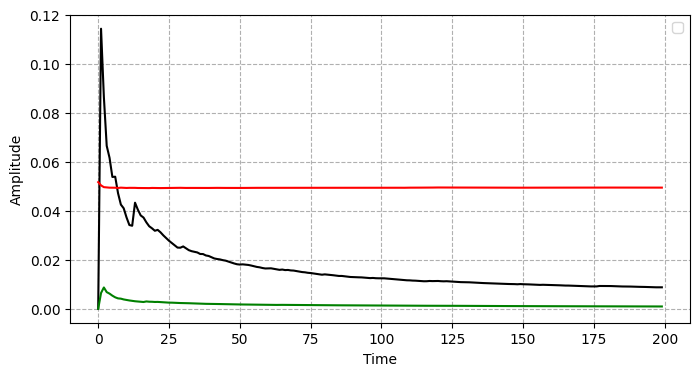

In [8]:
se = np.array(se)
mean_score = np.array(mean_score)

import matplotlib.pyplot as plt

#print(se.shape)
print('各観測値の95％信頼区間の最大:',1.96 * np.max(se, axis = 1)[MAX_TRIALS-1])
print('各観測値の95％信頼区間の平均:',1.96 * np.mean(se, axis = 1)[MAX_TRIALS-1])
#print(mean_score.shape)
print('MAEの平均値:',mean_score[MAX_TRIALS-1])

# Running Test Predictions
plt.figure(figsize=(8, 4))
plt.plot(1.96 *np.max(se,axis = 1), color = "black")
plt.plot(1.96 *np.mean(se,axis = 1), color = "green")
plt.plot(mean_score, color = "red")
plt.legend()#loc='lower right')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(which='major', linestyle='--', axis='both')

plt.show()

In [9]:
# 7. 平均予測を計算して保存
mean_preds = preds_array.mean(axis=0)
output_df = pd.DataFrame({
    'sample': df["sample"][data[:, 1] == 2].values,
    'y_pred': mean_preds
})

In [13]:
# 8. 保存先を指定（任意の場所に変更可）
save_path = '/content/drive/MyDrive/github/DNN_Easton_prediction.xlsx'
output_df.to_excel(save_path, index=False)
print("予測結果を保存しました：", save_path)

予測結果を保存しました： /content/drive/MyDrive/github/DNN_Easton_prediction.xlsx
